In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

To analyze the results, two indexes are going to be considered:
- Speedup: $S(n, t) = \frac{T_{s}(n)}{T_{p}(n)}$
    - The speedup measures how much faster the parallel algorithm is compared to the sequential one.
    - $p$ is the number of used cores.
    - $T_{s}(n)$ is the time taken by the sequential algorithm.
    - $T_{p}(n)$ is the time taken by the parallel algorithm.
- Efficiency: $E(n, t) = \frac{S(n, t)}{p}$
    - The efficiency measures the percentage of time for which a processor is utilized effectively.

The theorical maximum speedup is $p$, while the maximum efficiency is $1$.

In [68]:
def get_summary(filename):
    path = f"results/{filename}.csv"
    data = pd.read_csv(path)
    data = data.groupby('OMP-threads').mean()
    data.reset_index(inplace=True)
    return data

omp_ordered = get_summary('omp_ordered_10000')

In [69]:
# speedup:
omp_ordered['speedup'] = omp_ordered['time'].iloc[0] / omp_ordered['time']
# efficiency:
omp_ordered['efficiency'] = omp_ordered['speedup'] / omp_ordered['OMP-threads']

omp_ordered

,OMP-threads,size,time,speedup,efficiency
0,1,10000.0,79.070767,1.000000,1.000000
1,2,10000.0,40.208491,1.966519,0.983260
2,3,10000.0,27.134883,2.913990,0.971330
3,4,10000.0,20.629881,3.832827,0.958207
4,5,10000.0,16.769590,4.715128,0.943026
...,...,...,...,...,...
59,60,10000.0,2.472324,31.982367,0.533039
60,61,10000.0,2.460960,32.130046,0.526722
61,62,10000.0,2.430758,32.529269,0.524666
62,63,10000.0,2.411757,32.785545,0.520405


Text(0.5, 0, 'Number of OpenMP threads')

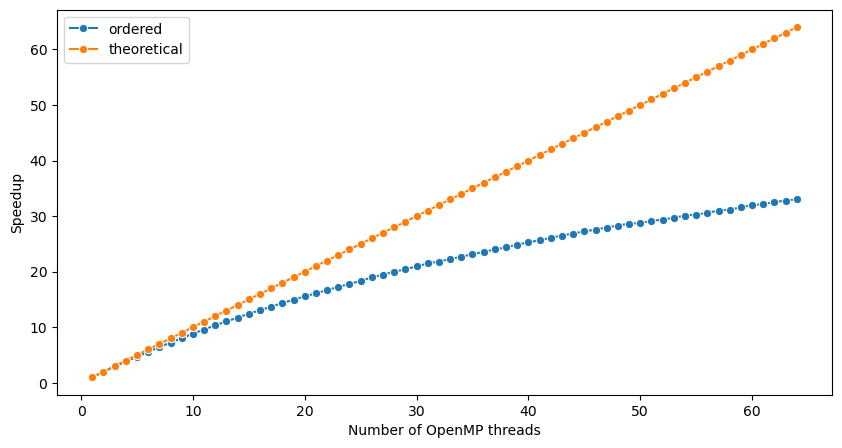

In [35]:
# plotting the speedup:
plt.figure(figsize=(10, 5))

sns.lineplot(
    x='OMP-threads', 
    y='speedup', 
    data=omp_ordered, 
    marker='o', 
    label='ordered'
)

# theoretical speedup:
sns.lineplot(
    x='OMP-threads', 
    y='OMP-threads', 
    data=omp_ordered, 
    marker='o', 
    label='theoretical'
)

plt.ylabel('Speedup')
plt.xlabel('Number of OpenMP threads')

<Axes: xlabel='OMP-threads', ylabel='efficiency'>

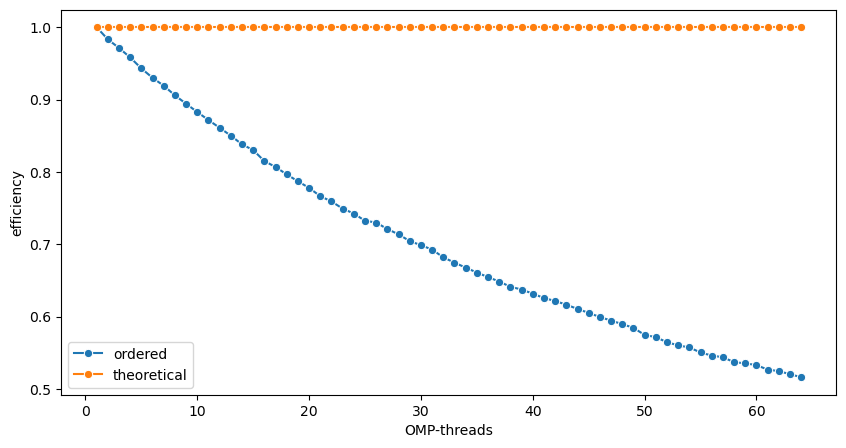

In [37]:
# plotting the efficiency:
plt.figure(figsize=(10, 5))

sns.lineplot(
    x='OMP-threads', 
    y='efficiency', 
    data=omp_ordered, 
    marker='o', 
    label='ordered'
)

# theoretical efficiency:
# it's just a horizontal line at 1
sns.lineplot(
    x='OMP-threads', 
    y=1, 
    data=omp_ordered, 
    marker='o', 
    label='theoretical'
)